<a href="https://colab.research.google.com/github/g-sarrazin/us-yield-curves/blob/main/UST_curves_fetch_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ustreasurycurve


In [5]:
import ustreasurycurve as ustcurve
from datetime import datetime, timedelta
import pandas as pd
from google.colab import drive

# Mount Google Drive to save the output files there
drive.mount('/content/drive')

# Define date range
start_date = '2024-01-01'
end_date = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')

# Fetching the real and nominal rates data
ustrcurve_real = ustcurve.realRates(start_date, end_date)
ustcurve_nominal = ustcurve.nominalRates(start_date, end_date)

# Convert the fetched data into pandas DataFrames
ustrcurve_real_df = pd.DataFrame(ustrcurve_real)
ustcurve_nominal_df = pd.DataFrame(ustcurve_nominal)

# Print the DataFrames to inspect the data structure
print(ustrcurve_real_df.tail())
print(ustcurve_nominal_df.tail())

# Save the data to Google Drive
real_csv_path = '/content/drive/My Drive/Colab Notebooks/ustrcurve_real.csv'
nominal_csv_path = '/content/drive/My Drive/Colab Notebooks/ustcurve_nominal.csv'

# Save the data to CSV files
ustrcurve_real_df.to_csv(real_csv_path, index=False)
ustcurve_nominal_df.to_csv(nominal_csv_path, index=False)

print(f"Real rates saved to: {real_csv_path}")
print(f"Nominal rates saved to: {nominal_csv_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/ustreasurycurve/realRates.py:18: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(requests.get('https://home.treasury.gov/resource-center/data-chart-center/interest-rates/pages/xml?data=daily_treasury_real_yield_curve&field_tdr_date_value=' + str(year), verify=re

          date      5y      7y     10y     20y     30y
303 2025-03-20   0.015  0.0174  0.0193  0.0219  0.0231
304 2025-03-21  0.0149  0.0173  0.0192  0.0221  0.0235
305 2025-03-24  0.0155  0.0179  0.0198  0.0227   0.024
306 2025-03-25  0.0151  0.0176  0.0196  0.0225  0.0239
307 2025-03-26  0.0152  0.0178  0.0198  0.0227  0.0241
          date      1m      2m      3m      6m      1y      2y      3y  \
303 2025-03-20  0.0436  0.0434  0.0433  0.0427  0.0406  0.0395  0.0393   
304 2025-03-21  0.0436  0.0433  0.0433  0.0426  0.0404  0.0394  0.0392   
305 2025-03-24  0.0435  0.0434  0.0433  0.0427  0.0411  0.0404  0.0401   
306 2025-03-25  0.0436  0.0433  0.0433  0.0426  0.0409  0.0396  0.0398   
307 2025-03-26  0.0436  0.0433  0.0433  0.0426   0.041  0.0398  0.0401   

         5y     10y     20y     30y  
303  0.0401  0.0424  0.0457  0.0455  
304    0.04  0.0425   0.046  0.0459  
305  0.0409  0.0434  0.0468  0.0466  
306  0.0407  0.0431  0.0467  0.0465  
307  0.0408  0.0435  0.0471  0.0469

Mounted at /content/drive


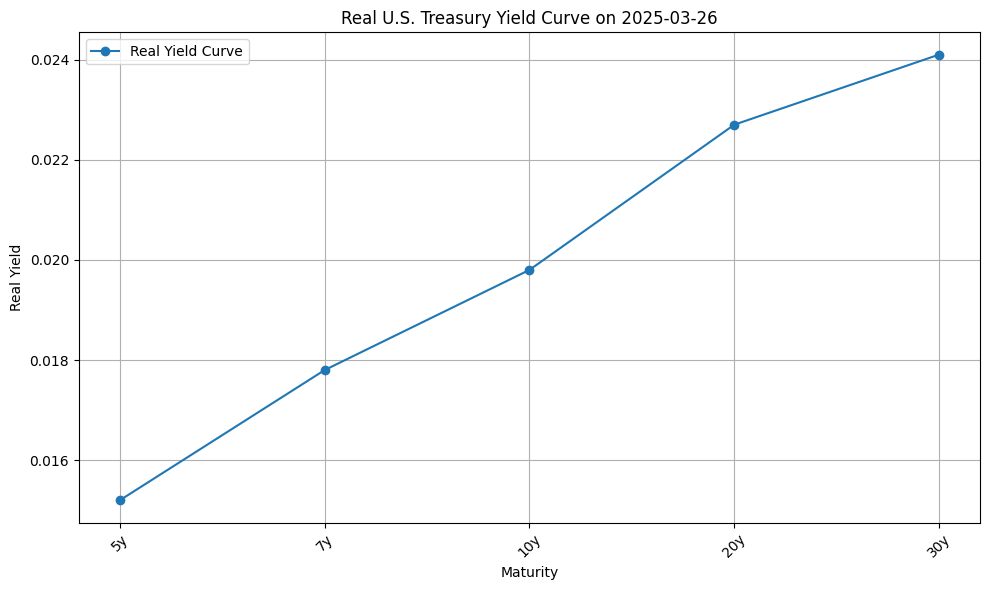

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load real yield data
real_path = "/content/drive/My Drive/Colab Notebooks/ustrcurve_real.csv"
real_df = pd.read_csv(real_path)
real_df['date'] = pd.to_datetime(real_df['date'])

# Get latest row
latest_real = real_df.sort_values('date').iloc[-1]
real_series = latest_real.drop(labels='date')

# Convert to proper maturity order
def maturity_to_months(label):
    label = label.strip()
    if label.endswith('m'):
        return int(label[:-1])
    elif label.endswith('y'):
        return int(label[:-1]) * 12
    return float('inf')

real_series = real_series.sort_index(key=lambda x: x.map(maturity_to_months))

# Plot Real Yield Curve
plt.figure(figsize=(10, 6))
plt.plot(real_series.index, real_series.values, marker='o', label='Real Yield Curve')
plt.xlabel("Maturity")
plt.ylabel("Real Yield")
plt.title(f"Real U.S. Treasury Yield Curve on {latest_real['date'].date()}")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


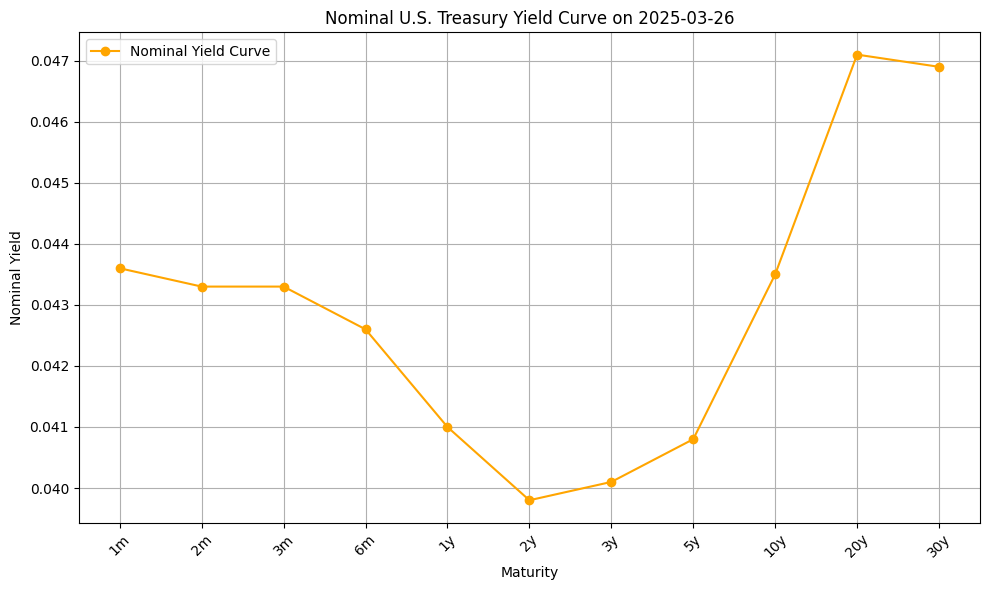

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load nominal yield data
nominal_path = "/content/drive/My Drive/Colab Notebooks/ustcurve_nominal.csv"
nominal_df = pd.read_csv(nominal_path)
nominal_df['date'] = pd.to_datetime(nominal_df['date'])

# Get latest row
latest_nominal = nominal_df.sort_values('date').iloc[-1]
nominal_series = latest_nominal.drop(labels='date')

# Sort maturities correctly
def maturity_to_months(label):
    label = label.strip()
    if label.endswith('m'):
        return int(label[:-1])
    elif label.endswith('y'):
        return int(label[:-1]) * 12
    return float('inf')

nominal_series = nominal_series.sort_index(key=lambda x: x.map(maturity_to_months))

# Plot Nominal Yield Curve
plt.figure(figsize=(10, 6))
plt.plot(nominal_series.index, nominal_series.values, marker='o', label='Nominal Yield Curve', color='orange')
plt.xlabel("Maturity")
plt.ylabel("Nominal Yield")
plt.title(f"Nominal U.S. Treasury Yield Curve on {latest_nominal['date'].date()}")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


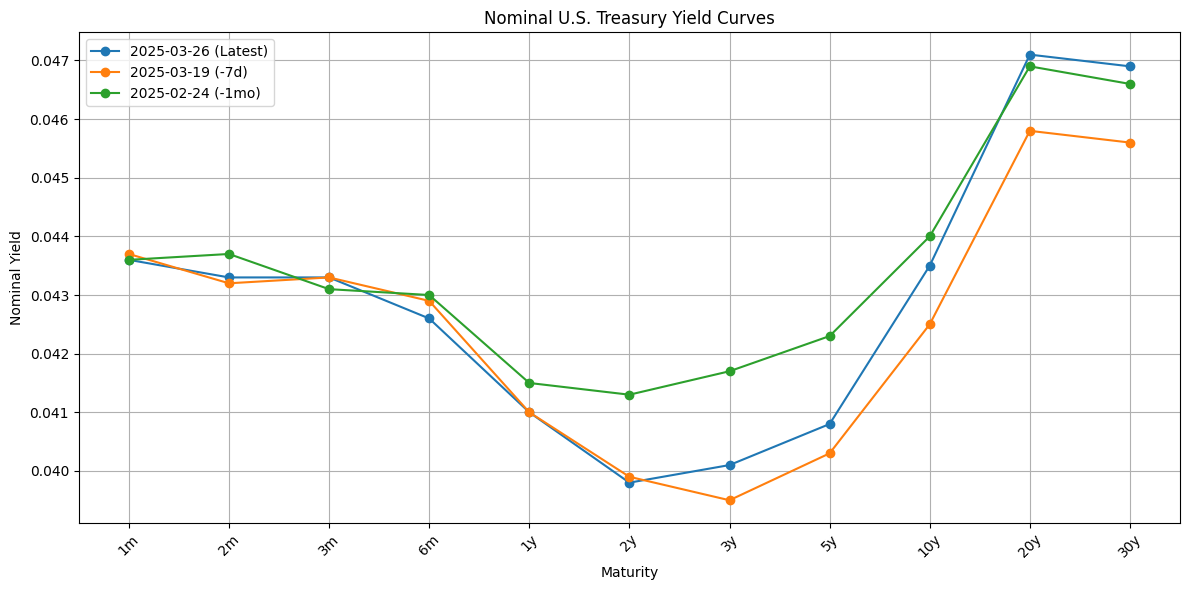

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load nominal yield data
nominal_path = "/content/drive/My Drive/Colab Notebooks/ustcurve_nominal.csv"
nominal_df = pd.read_csv(nominal_path)
nominal_df['date'] = pd.to_datetime(nominal_df['date'])

# Get latest date
latest_date = nominal_df['date'].max()
date_7d = latest_date - timedelta(days=7)
date_1m = latest_date - timedelta(days=30)

# Function to get closest date row before a target date
def get_closest_before(df, target_date):
    return df[df['date'] <= target_date].sort_values('date').iloc[-1]

# Get yield curves
curve_latest = get_closest_before(nominal_df, latest_date).drop('date')
curve_7d = get_closest_before(nominal_df, date_7d).drop('date')
curve_1m = get_closest_before(nominal_df, date_1m).drop('date')

# Sorting function
def maturity_to_months(label):
    label = label.strip()
    if label.endswith('m'):
        return int(label[:-1])
    elif label.endswith('y'):
        return int(label[:-1]) * 12
    return float('inf')

# Sort all curves by maturity
curve_latest = curve_latest.sort_index(key=lambda x: x.map(maturity_to_months))
curve_7d = curve_7d.sort_index(key=lambda x: x.map(maturity_to_months))
curve_1m = curve_1m.sort_index(key=lambda x: x.map(maturity_to_months))

# Plot all three
plt.figure(figsize=(12, 6))
plt.plot(curve_latest.index, curve_latest.values, marker='o', label=f"{latest_date.date()} (Latest)")
plt.plot(curve_7d.index, curve_7d.values, marker='o', label=f"{date_7d.date()} (-7d)")
plt.plot(curve_1m.index, curve_1m.values, marker='o', label=f"{date_1m.date()} (-1mo)")
plt.xlabel("Maturity")
plt.ylabel("Nominal Yield")
plt.title("Nominal U.S. Treasury Yield Curves")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
